# TinyAES Attack

AES encryption :

/home/gata/Bureau/MA3/semester_project/project/hardware/victims/firmware/crypto/tiny-AES128-C

---
Objective : Redo paper https://eprint.iacr.org/2021/1252.pdf

---

## AES Python model

In [1]:
sbox = [
    # 0    1    2    3    4    5    6    7    8    9    a    b    c    d    e    f 
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76, # 0
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0, # 1
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15, # 2
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75, # 3
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84, # 4
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf, # 5
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8, # 6
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2, # 7
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73, # 8
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb, # 9
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79, # a
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08, # b
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a, # c
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e, # d
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf, # e
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16  # f
]

def aes_internal(inputdata, key):
    return sbox[inputdata ^ key]

def calc_hamming_weight(n):
    return bin(n).count("1")

HW = []
for i in range(256):
    HW += [calc_hamming_weight(i)]
    
assert HW[aes_internal(0xA1, 0x79)] == 3
assert HW[aes_internal(0x22, 0xB1)] == 5
print("‚úîÔ∏è OK to continue!")

‚úîÔ∏è OK to continue!


In [2]:
# See https://github.com/boppreh/aes/

def pad(plaintext):
    padding_len = 16 - (len(plaintext) % 16)
    padding = bytes([padding_len] * padding_len)
    return plaintext + padding

def unpad(plaintext):
    padding_len = plaintext[-1]
    assert padding_len > 0
    message, padding = plaintext[:-padding_len], plaintext[-padding_len:]
    assert all(p == padding_len for p in padding)
    return message

def bytes2matrix(text):
    """ Converts a 16-byte array into a 4x4 matrix.  """
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    """ Converts a 4x4 matrix into a 16-byte array.  """
    return bytes(sum(matrix, []))

def xor_bytes(a, b):
    """ Returns a new byte array with the elements xor'ed. """
    return bytes(i^j for i, j in zip(a, b))

def print_byte_array_in_hex(array):
    tmp = np.array(list(map(lambda elem: hex(elem), array)))
    print(tmp)
    return tmp

def state_to_hamming_weight(s):
    for i in range(4):
        for j in range(4):
            s[i][j] = HW[s[i][j]]
            
def print_state_to_hex_str(s):
    for i in range(4):
        for j in range(4):
            s[i][j] = hex(s[i][j])[2:]
    print(s)
    state_from_hex_str_to_int(s)
            
def state_from_hex_str_to_int(s):
    for i in range(4):
        for j in range(4):
            s[i][j] = int(s[i][j], 16)

In [3]:
bytes_msg = b"AES message"
tmp = (matrix2bytes(bytes2matrix(pad(bytes_msg))))
assert unpad(matrix2bytes(bytes2matrix(pad(bytes_msg)))) == bytes_msg
print("‚úîÔ∏è OK to continue!")

‚úîÔ∏è OK to continue!


In [4]:
# Addition key or Round key : AK
def add_round_key(s, k):
    for i in range(4):
        for j in range(4):
            s[i][j] ^= k[i][j]

# Sub-bytes or S-Box : SB
def sub_bytes(s):
    if type(s) != list:
        return sbox[s]
    elif type(s[0]) == list:
        for i in range(4):
            for j in range(4):
                s[i][j] = sbox[s[i][j]]
        return s
    elif type(s[0]) == int:
        for i in range(4):
            s[i] = sbox[s[i]]
        return s

# Shift rows or Permutation: PB
def shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[1][1], s[2][1], s[3][1], s[0][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[3][3], s[0][3], s[1][3], s[2][3]
    
def custom_shift_rows(plaintext, index):
    shift_rows = [0x00, 0x01, 0x02, 0x03, 0x05, 0x06, 0x07, 0x04, 0x0A, 0x0B, 0x08, 0x09, 0x0F, 0x0C, 0x0D, 0x0E]
    return s[shift_rows[index]]

# Diffusion layer or Mix Column : MC
xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)
    
def mix_single_column(a):
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)

def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])
        
# Key scheduling KS
r_con = (
    0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
    0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
    0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
    0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
)

def expand_key(master_key):
    # Initialize round keys with raw key material.
    key_columns = [bytes(elem) for elem in bytes2matrix(master_key)]
    iteration_size = len(master_key) // 4

    i = 1
    while len(key_columns) < (10 + 1) * 4:
        # Copy previous word.
        word = list(key_columns[-1])

        # Perform schedule_core once every "row".
        if len(key_columns) % iteration_size == 0:
            # Circular shift.
            word.append(word.pop(0))
            # Map to S-BOX.
            word = [sub_bytes(b) for b in word]
            # XOR with first byte of R-CON, since the others bytes of R-CON are 0.
            word[0] ^= r_con[i]
            i += 1
        elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
            # Run word through S-box in the fourth iteration when using a
            # 256-bit key.
            word = [sub_bytes(b) for b in word]

        # XOR with equivalent word from previous iteration.
        word = xor_bytes(word, key_columns[-iteration_size])
        key_columns.append(word)

    # Group key words in 4x4 byte matrices.
    return [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]

In [5]:
# AES* - 10 rounds
def AES_128_enc(plaintext, key):
    assert len(plaintext) == 16

    plain_state = bytes2matrix(plaintext)

    add_round_key(plain_state, key[0])
    
    for i in range(1, 10):
        sub_bytes(plain_state)
        shift_rows(plain_state)
        mix_columns(plain_state)
        add_round_key(plain_state, key[i])

    sub_bytes(plain_state)
    shift_rows(plain_state)
    add_round_key(plain_state, key[10])

    return matrix2bytes(plain_state)

Test AES python implementation :

In [6]:
plaintext = bytes([0x00 for i in range(16)])
key = expand_key([0x00 for i in range(16)])

assert AES_128_enc(plaintext, key).hex() == "66e94bd4ef8a2c3b884cfa59ca342b2e"
print("‚úîÔ∏è OK to continue!")

‚úîÔ∏è OK to continue!


## AES with ChipWhisperer board

Connect and init. with ChipWhisperer board

In [7]:
SCOPETYPE = 'OPENADC'
PLATFORM='CW308_STM32F4'
CRYPTO_TARGET='TINYAES128C'
AES_TINY_VERSION='V0'

In [8]:
%run "Setup_Scripts/Setup_Generic.ipynb"

OSError: Could not find ChipWhisperer. Is it connected?

OSError: Could not find ChipWhisperer. Is it connected?

In [ ]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$AES_TINY_VERSION"
cd hardware/victims/firmware/simpleserial-aes
make PLATFORM=$1 CRYPTO_TARGET=$2 AES_TINY_VERSION=$3

In [ ]:
cw.program_target(scope, prog, "hardware/victims/firmware/simpleserial-aes/simpleserial-aes-{}.hex".format(PLATFORM))

In [ ]:
project = cw.create_project("traces/STM32F4_HW_AES.cwp", overwrite=True)

Test board receive/send

In [ ]:
# Read from board
# Read Debug
recv_msg = ""
sub_read = target.read()
while sub_read != "":
    recv_msg += sub_read
    sub_read = target.read()

assert "hello" in recv_msg
print("‚úîÔ∏è OK to continue!")

## Test AES.c implementation

In [9]:
import tqdm
import numpy as np
import time

ktp = cw.ktp.Basic()
key, text = ktp.next() 
target.set_key(key)

NameError: name 'target' is not defined

In [25]:
plaintext = bytes([0x00 for i in range(16)])
key = [0x00 for i in range(16)]
key_exp = expand_key(key)
result = 0x66e94bd4ef8a2c3b884cfa59ca342b2e

In [26]:
key = bytearray(key)
text = bytearray(plaintext)

target.set_key(key)

scope.arm()

target.simpleserial_write('p', text)
ret = scope.capture()

if ret:
    print("Target timed out!")

response = target.simpleserial_read('r', 16)

result_c = ""
for byte in response:
    result_c += hex(byte)[2:]

assert int(result_c, 16) == result
print("‚úîÔ∏è OK to continue!")

‚úîÔ∏è OK to continue!


## DPA Attack based on tuto

In [16]:
import tqdm
import numpy as np
import time

ktp = cw.ktp.Basic()
trace_array = []
textin_array = []

key, text = ktp.next() 



target.set_key(key)

N = 2500
for i in tqdm.trange(N, desc='Capturing traces'):
    scope.arm()
    
    target.simpleserial_write('p', text)
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    response = target.simpleserial_read('r', 16)
    
    trace_array.append(scope.get_last_trace())
    textin_array.append(text)
    
    key, text = ktp.next() 

Capturing traces: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [01:18<00:00, 31.83it/s]


<IPython.core.display.Javascript object>


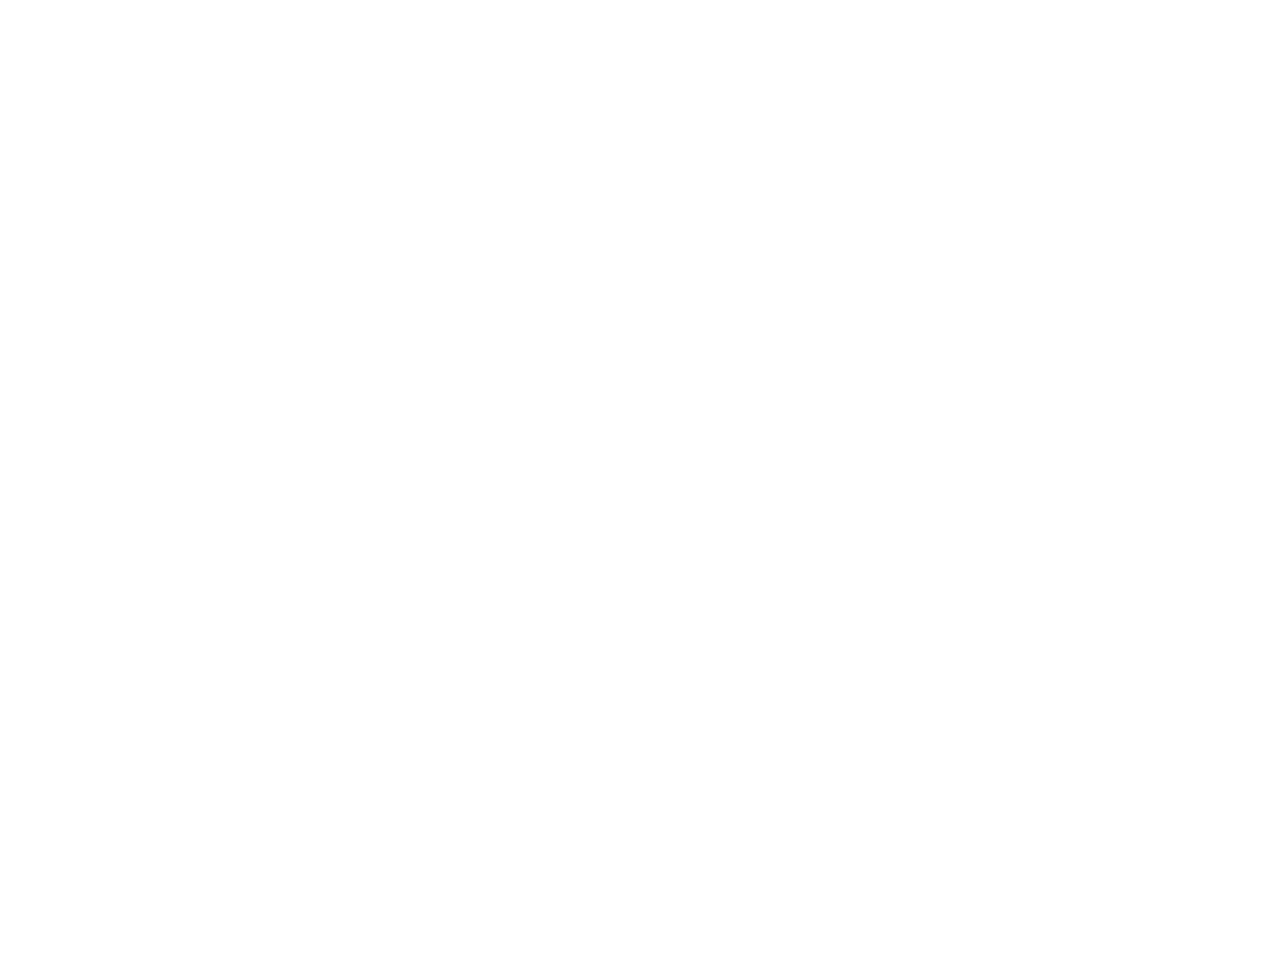

In [17]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.figure()
plt.plot(trace_array)
plt.show()

In [18]:
numtraces = np.shape(trace_array)[0] #total number of traces
numpoints = np.shape(trace_array)[1] #samples per trace

In [19]:
def calculate_diffs(guess, byteindex=0, bitnum=0):
    """Perform a simple DPA on two traces, uses global `textin_array` and `trace_array` """
    
    one_list = []
    zero_list = []

    for trace_index in range(numtraces):
        hypothetical_leakage = aes_internal(guess, textin_array[trace_index][byteindex])

        #Mask off the requested bit
        if hypothetical_leakage & (1<<bitnum):
            one_list.append(trace_array[trace_index])
        else:
            zero_list.append(trace_array[trace_index])

    one_avg = np.asarray(one_list).mean(axis=0)
    zero_avg = np.asarray(zero_list).mean(axis=0)
    return abs(one_avg - zero_avg)

In [20]:
from tqdm import tnrange
import numpy as np

#Store your key_guess here, compare to known_key
key_guess = []
known_key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x15, 0x88, 0x09, 0xcf, 0x4f, 0x3c]

for subkey in tqdm.tnrange(0, 16, desc="Attacking Subkey"):
    max_diffs = [0]*256
    full_diffs = [0]*256
    for guess in range(0, 256):
        full_diff_trace = calculate_diffs(guess, subkey)
        max_diffs[guess] = np.max(full_diff_trace)
        full_diffs[guess] = full_diff_trace
        
    #Get argument sort, as each index is the actual key guess.
    sorted_args = np.argsort(max_diffs)[::-1]
    
    #Keep most likely
    key_guess.append(sorted_args[0])
    
    #Print results
    print("Subkey %2d - most likely %02X (actual %02X)"%(subkey, key_guess[subkey], known_key[subkey]))
    
    #Print other top guesses
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_diffs[g]))
    
    print("\n")

/tmp/ipykernel_5295/971741942.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for subkey in tqdm.tnrange(0, 16, desc="Attacking Subkey"):


Attacking Subkey:   0%|          | 0/16 [00:00<?, ?it/s]

Subkey  0 - most likely 2B (actual 2B)
 Top 5 guesses: 
   2B - Diff = 0.016002
   96 - Diff = 0.008675
   69 - Diff = 0.008020
   40 - Diff = 0.007854
   34 - Diff = 0.007670


Subkey  1 - most likely 7E (actual 7E)
 Top 5 guesses: 
   7E - Diff = 0.015760
   E8 - Diff = 0.007956
   15 - Diff = 0.007663
   8C - Diff = 0.007573
   C3 - Diff = 0.007390


Subkey  2 - most likely 15 (actual 15)
 Top 5 guesses: 
   15 - Diff = 0.017207
   7E - Diff = 0.009004
   8C - Diff = 0.008232
   7C - Diff = 0.007933
   A8 - Diff = 0.007745


Subkey  3 - most likely 16 (actual 16)
 Top 5 guesses: 
   16 - Diff = 0.015302
   7D - Diff = 0.008719
   E8 - Diff = 0.008211
   AB - Diff = 0.007501
   43 - Diff = 0.007427


Subkey  4 - most likely 28 (actual 28)
 Top 5 guesses: 
   28 - Diff = 0.017404
   43 - Diff = 0.009014
   DA - Diff = 0.008188
   B1 - Diff = 0.007897
   63 - Diff = 0.007836


Subkey  5 - most likely AE (actual AE)
 Top 5 guesses: 
   AE - Diff = 0.015515
   37 - Diff = 0.008943
   42 

# DPA Attack based on paper

In [22]:
# Set the key
def set_up(key):
    ktp = cw.ktp.Basic()
    key, text = ktp.next() 
    target.set_key(bytearray(key))

# Encrypt plaintext p once and returns its power trace
def encrypt_p_power(p):
    scope.arm()
    
    target.simpleserial_write('p', bytearray(p))
    ret = scope.capture()
    if ret:
        print("Target timed out!")
    
    trace_array = scope.get_last_trace()
    return trace_array

# Encrypt plaintext p n-times and returns average power trace
def encrypt_p_power_repeat_n(p, n):
    res = np.array(encrypt_p_power(p))
    for i in range(n - 1):
        tmp = np.array(encrypt_p_power(p))
        res += tmp
    return (1/n*res).tolist()

Record one power trace to identify in it operations

In [22]:
plaintext = [0x00 for i in range(16)]
key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x15, 0x88, 0x09, 0xcf, 0x4f, 0x3c]
set_up(key)

MAX_cwlite = 24400
scope.adc.samples = 9000

avg_trace = encrypt_p_power_repeat_n(plaintext, 1000)

<IPython.core.display.Javascript object>


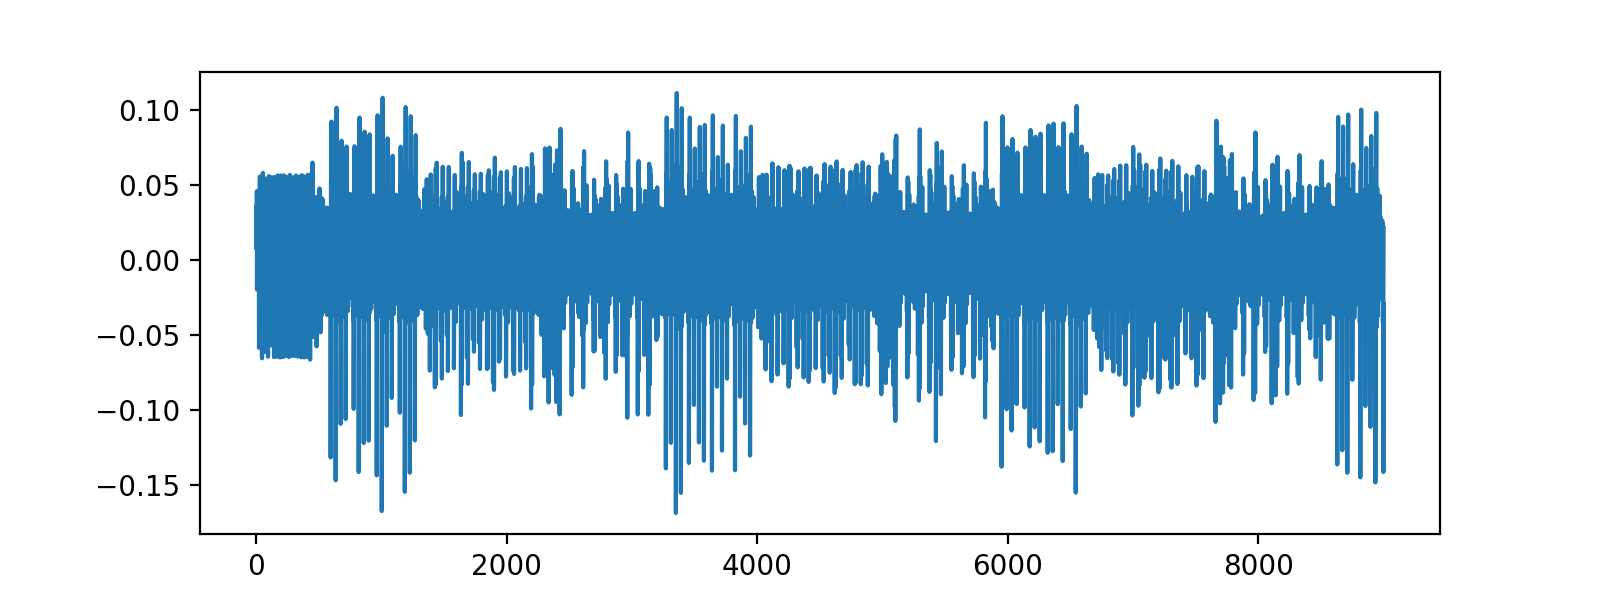

In [23]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (8,3)

plt.figure()
plt.plot(avg_trace)
plt.show()

### BLOCK COPY

![alt text](Block_copy.png "Block Copy")


In [24]:
# FOR BLOCK COPY
spikes = np.array(avg_trace[0:440])
index = np.where(spikes >= 0.0525)[0]
index = index[index > 65]

print(index)
#assert len(index) == 16 # REDO
index = np.array([76, 100, 124, 148, 172, 196, 220, 244, 268, 292, 316, 340, 364, 388, 412, 436])

[ 70  76  82  88  94 100 106 112 115 152 153 162 163 173 183 199 208 209
 219 228 229 244 245 254 255 265 275 291 300 301 310 311 320 321 343 351
 361 363 375 387 399 413 415 427 439]


BlockCopy behaviour

key = 0x00 0xFF 0x00 ...

index = [ 76  92  95  96 100 124 148 172 196 220 244 268 292 316 340 364 388 412
 436]

key = 0xFF 0x00 ...

index = [ 71  72  76 100 124 148 172 196 220 244 268 292 316 340 364 388 412 436]


key = 0x00 0x00 ...

index = [ 76 100 124 148 172 196 220 240 244 268 292 316 340 364 388 412 436]

### ROUND KEY


![alt text](round_key_16_spikes0.png "16 spikes for RK")

In [25]:
# FOR AC(0)
spikes = np.array(avg_trace[0:1300])
index = np.where(spikes >= 0.070)[0]
index = index[index > 580]

print(index)
#assert len(index) == 16 # REDO
index = np.array([600, 640, 680, 720, 784, 824, 864, 904, 968, 1008, 1048, 1088,1152, 1192, 1232, 1272])

[ 588  603  610  657  745  822  832  842  852  868  878  888  898  914
  934  960  970  980  990 1252 1279 1280]


### SHIFT ROWS

![alt text](Shift_Rows.png "16 spikes for RK")

In [46]:
# FOR SHIFT ROWS (PB)
def find_best_occurances(sub_trace, overall_trace):
    length = np.shape(sub_trace)[0]
    best_i = 0
    avg = float('inf')
    for i in range(np.shape(overall_trace)[0] - length):
        avg_tmp = np.sum(np.abs(overall_trace[i:i+length] - sub_trace), axis = 0)
        if avg_tmp < avg:
            best_i = i 
            avg = avg_tmp
    return best_i

def insert_0(index_0_left, index_0_right, overall_trace):
    assert index_0_right >= index_0_left
    assert index_0_left >= 0
    return np.concatenate((overall_trace[:index_0_left], np.zeros(index_0_right - index_0_left - 1), overall_trace[index_0_left:]))

In [73]:
%run "Setup_Scripts/Setup_Generic.ipynb"
AES_TINY_VERSION='V1'

INFO: Found ChipWhispererüòç


In [74]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$AES_TINY_VERSION"
cd hardware/victims/firmware/simpleserial-aes-2
make PLATFORM=$1 CRYPTO_TARGET=$2  AES_TINY_VERSION=$3

Building for platform CW308_STM32F4 with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
make clean_objs .dep 
make[1]¬†: on entre dans le r√©pertoire ¬´¬†/home/gata/Bureau/MA3/semester_project/project/hardware/victims/firmware/simpleserial-aes-2¬†¬ª
Building for platform CW308_STM32F4 with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CW308_STM32F4.hex
rm -f -- simpleserial-aes-CW308_STM32F4.eep
rm -f -- simpleserial-aes-CW308_STM32F4.cof
rm -f -- simpleserial-aes-CW308_STM32F4.elf
rm -f -- simpleserial-aes-CW308_STM32F4.map
rm -f -- simpleserial-aes-CW308_STM32F4.sym
rm -f -- simpleserial-aes-CW308_STM32F4.lss
rm -f -- objdir-CW308_STM32F4/*.o
rm -f -- objdir-CW308_STM32F4/*.lst
rm -f -- simpleserial-aes.s simpleserial.s stm32f4_hal.s stm32f4_hal_lowlevel.s stm32f4_sysmem.s stm32f4xx_hal_rng.s aes.s aes-independant.s
rm -f -- simpleserial-aes.d simpleserial.d stm32f4_

In file included from .././hal/stm32f4/stm32f4_hal.c:3:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


.
Compiling C: .././hal/stm32f4/stm32f4_hal_lowlevel.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F415RGTx -DSTM32F4 -DSTM32 -DDEBUG -DSTM32F415xx -DHAL_TYPE=HAL_stm32f4 -DPLATFORM=CW308_STM32F4 -DTINYAES128C -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F4/stm32f4_hal_lowlevel.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f4 -I.././hal/stm32f4/CMSIS -I.././hal/stm32f4/CMSIS/core -I.././hal/stm32f4/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto2/ -I.././crypto2/tiny-AES128-C -std=gnu99  -MMD -MP -MF .dep/stm32f4_hal_lowlevel.o.d .././hal/stm32f4/stm32f4_hal_lowlevel.c -o objdir-CW308_STM32F4/stm32f4_hal_lowlevel.o


In file included from .././hal/stm32f4/stm32f4_hal_lowlevel.c:39:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


.
Compiling C: .././hal/stm32f4/stm32f4_sysmem.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F415RGTx -DSTM32F4 -DSTM32 -DDEBUG -DSTM32F415xx -DHAL_TYPE=HAL_stm32f4 -DPLATFORM=CW308_STM32F4 -DTINYAES128C -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F4/stm32f4_sysmem.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f4 -I.././hal/stm32f4/CMSIS -I.././hal/stm32f4/CMSIS/core -I.././hal/stm32f4/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto2/ -I.././crypto2/tiny-AES128-C -std=gnu99  -MMD -MP -MF .dep/stm32f4_sysmem.o.d .././hal/stm32f4/stm32f4_sysmem.c -o objdir-CW308_STM32F4/stm32f4_sysmem.o
.
Compiling C: .././hal/stm32f4/stm32f4xx_hal_rng.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fme

.././hal/stm32f4/stm32f4xx_hal_rng.c: In function 'HAL_RNG_GenerateRandomNumber':
.././hal/stm32f4/stm32f4xx_hal_rng.c:264:17: warning: implicit declaration of function 'HAL_GetTick' [-Wimplicit-function-declaration]
  264 |     tickstart = HAL_GetTick();
      |                 ^~~~~~~~~~~


.
Compiling C: .././crypto2/tiny-AES128-C/aes.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F415RGTx -DSTM32F4 -DSTM32 -DDEBUG -DSTM32F415xx -DHAL_TYPE=HAL_stm32f4 -DPLATFORM=CW308_STM32F4 -DTINYAES128C -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F4/aes.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f4 -I.././hal/stm32f4/CMSIS -I.././hal/stm32f4/CMSIS/core -I.././hal/stm32f4/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto2/ -I.././crypto2/tiny-AES128-C -std=gnu99  -MMD -MP -MF .dep/aes.o.d .././crypto2/tiny-AES128-C/aes.c -o objdir-CW308_STM32F4/aes.o
.
Compiling C: .././crypto2/aes-independant.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwar

In [75]:
cw.program_target(scope, prog, "hardware/victims/firmware/simpleserial-aes-2/simpleserial-aes-{}.hex".format(PLATFORM))
project = cw.create_project("traces/STM32F4_HW_AES_2.cwp", overwrite=True)

Detected known STMF32: STM32F40xxx/41xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 6555 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 6555 bytes


In [76]:
plaintext = [0x00 for i in range(16)]
key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x15, 0x88, 0x09, 0xcf, 0x4f, 0x3c]
set_up(key)

MAX_cwlite = 24400
scope.adc.samples = 9000

In [77]:
start_index = 2250
stop_index = 2450
avg_trace_zoom = np.array(avg_trace[start_index:stop_index])
avg_trace_zoom_bis = encrypt_p_power_repeat_n(plaintext, 1000)[start_index:stop_index]

In [84]:
# Determine first difference in two traces
print(np.argwhere(np.abs(avg_trace_zoom_bis - avg_trace_zoom) > 1.0e-02)[0, 0])

59


<IPython.core.display.Javascript object>


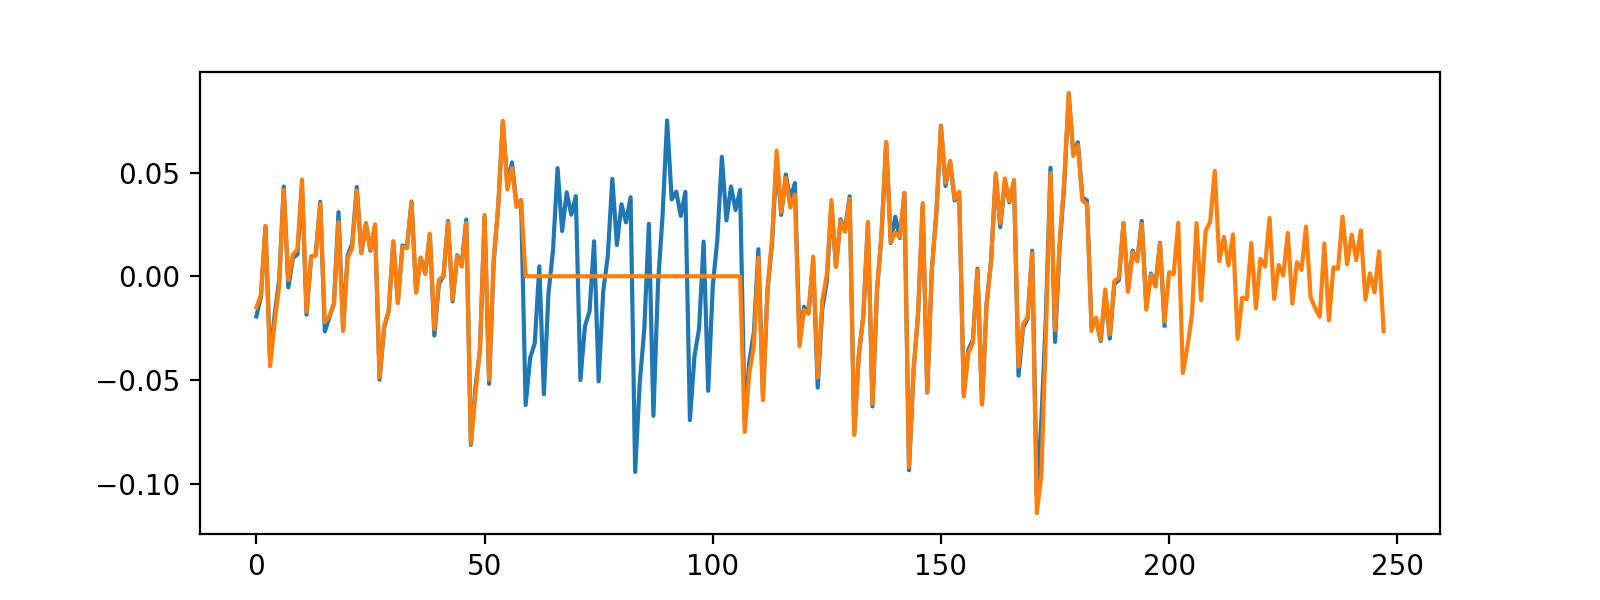

In [104]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (8,3)

plt.figure()
plt.plot(avg_trace_zoom)
plt.plot(insert_0(59, 108, avg_trace_zoom_bis), '-')
plt.show()

### Overall trace with operation indices

BlockCopy: 20 - 500

Round key (AK) : 590 - 1265

Sub bytes (SB) : 1390 - 2200

Shift rows (PB) : 2260 - 2500

Mix Columns (MC) : 2500 - 3200

Round key (AK) : 3250 - 4000

## Algo 1

### Recovering first byte of the key (i = 0)

In [26]:
def algo1_recover_ith_key_byte(p, i): # p = byte_msg, i subkey
    J = [0 for j in range(256)]
    for t in range(256): # t is guess 
        print(f"{t}/256", end='\r')
        p[i] = t
        # WITH RANGE INDICES : 
        e = np.array(encrypt_p_power_repeat_n(p, 30)[index[i] - 1:index[i]]).mean(axis = 0) # b_i,AK(0)
        # WITH ONLY ONE INDICE :
        # e = np.array(encrypt_p_power_repeat_n(p, 10)[index[i]]) # b_i,AK(0)
        # LIKE TUTO WITH S_BOX Leak model
        # e = np.max(calculate_diffs(t, i))
        J[t] = e
    print("Done   ")
    t_min = np.argsort(np.array(J))
    return J, t_min

In [27]:
i = 0
J, res = algo1_recover_ith_key_byte(plaintext, i)

#Print results
print("Subkey %2d - most likely %02X (actual %02X)"%(i, res[0], key[i]))

#Print other top guesses
print(" Top 5 guesses: ")
for j in range(0, 5):
    print("   %02X - averge power trace: %.3f"%(res[j], J[res[j]]))
print("\n")

Done   
Subkey  0 - most likely 2B (actual 2B)
 Top 5 guesses: 
   2B - averge power trace: 0.021
   0B - averge power trace: 0.026
   2F - averge power trace: 0.027
   23 - averge power trace: 0.027
   6B - averge power trace: 0.027




### Estimate best index range of AC operation

In [39]:
def algo1_recover_ith_key_byte_range(p, i, l, m): # p = byte_msg, i subkey, l and m are positive integers s.t indices range are equal to [index - l, index + m)
    J = [0 for j in range(256)]
    for t in range(256): # t is guess 
        print(f"{t}/256", end='\r')
        p[i] = t
        if l == 0 and m == 0:
            e = np.array(encrypt_p_power_repeat_n(p, 1)[index[i]]) # b_i,AK(0)
        else:
            e = np.array(encrypt_p_power_repeat_n(p, 1)[index[i] - l:index[i] + m]).mean(axis = 0) # b_i,AK(0) [index - l, index + m)
        # e = np.max(calculate_diffs(t, i))
        J[t] = e
    print("Done     ", end='\r')
    t_min = np.argsort(np.array(J))
    return J, t_min

In [32]:
i = 0
diff_trace_list = []
for l in range(5):
    for m in range(5):
        J, res = algo1_recover_ith_key_byte_range(plaintext, i, l, m)
        print("Subkey %2d - most likely %02X (actual %02X)"%(i, res[0], key[i]))
        print(f"l = -{l}, m = {m}")
        print(f"Average power trace : {J[res[0]]}")
        if res[0] == key[i]:
            diff_trace_list += [J[res[1]] - J[res[0]]]
        else: 
            diff_trace_list += [0]

sorted_increasing_diff_trace_list = np.argsort(np.array(diff_trace_list))[::-1]

for n in range(0, 5):
    print(f"Best {n}th indices : l = {sorted_increasing_diff_trace_list[n]//5}, m = {sorted_increasing_diff_trace_list[n]%5}")

Subkey  0 - most likely 6B (actual 2B)
l = -0, m = 0
Average power trace : 0.0234375
Subkey  0 - most likely 3E (actual 2B)
l = -0, m = 1
Average power trace : 0.0380859375
Subkey  0 - most likely 6F (actual 2B)
l = -0, m = 2
Average power trace : 0.005859375
Subkey  0 - most likely EE (actual 2B)
l = -0, m = 3
Average power trace : -0.004231770833333333
Subkey  0 - most likely 11 (actual 2B)
l = -0, m = 4
Average power trace : -0.007568359375
Subkey  0 - most likely 2A (actual 2B)
l = -1, m = 0
Average power trace : 0.0205078125
Subkey  0 - most likely 2B (actual 2B)
l = -1, m = 1
Average power trace : 0.017578125
Subkey  0 - most likely AD (actual 2B)
l = -1, m = 2
Average power trace : 0.020833333333333332
Subkey  0 - most likely 38 (actual 2B)
l = -1, m = 3
Average power trace : 0.01025390625
Subkey  0 - most likely 62 (actual 2B)
l = -1, m = 4
Average power trace : 0.0033203125
Subkey  0 - most likely 2E (actual 2B)
l = -2, m = 0
Average power trace : 0.0048828125
Subkey  0 - most

Best 0th indices : l = 1, m = 1
Best 1th indices : l = 3, m = 2
Best 2th indices : l = 3, m = 1
Best 3th indices : l = 2, m = 1
Best 4th indices : l = 4, m = 4

In [33]:
score_list = []
for l in range(5):
    for m in range(5):
        score = 0
        print(f"{5*l + m}       ")
        for n in range(50):
            J, res = algo1_recover_ith_key_byte_range(plaintext, i, l, m)
            if res[0] == key[0]:
                score += 1
        score_list += [score]
        
best_score = np.argsort(np.array(score_list))[::-1]
for n in range(0, 5):
    print(f"Best {n}th indices : l = {best_score[n]//5}, m = {best_score[n]%5}")

0       
1        
2        
3        
4        
4        
5        
6        
7        
8        
8        
9        
10       
11       
12       
12       
13       
14       
15       
16       
16       
17       
18       
19       
20       
Best 0th indices : l = 1, m = 0
Best 1th indices : l = 4, m = 1
Best 2th indices : l = 4, m = 0
Best 3th indices : l = 2, m = 1
Best 4th indices : l = 3, m = 1


Best 0th indices : l = 1, m = 0
Best 1th indices : l = 4, m = 1
Best 2th indices : l = 4, m = 0
Best 3th indices : l = 2, m = 1
Best 4th indices : l = 3, m = 1

### Recover full key

In [34]:
# Recover all key 

def recover_key(p): # p = byte_msg
    i_guess_list = []
    for i in range(16):
        J, res = algo1_recover_ith_key_byte(p, i)
        print("Subkey %2d - most likely %02X (actual %02X)"%(i, res[0], key[i]))
        print(" Top 5 guesses: ")
        for j in range(0, 5):
            print("   %02X - averge power trace: %.3f: "%(res[j], J[res[j]]))
        print("\n")
        i_guess_list += [res[0]]
    return i_guess_list

In [35]:
key_guess = recover_key(plaintext)
assert key_guess == key

Done   
Subkey  0 - most likely 2B (actual 2B)
 Top 5 guesses: 
   2B - averge power trace: 0.021: 
   0B - averge power trace: 0.027: 
   3B - averge power trace: 0.028: 
   29 - averge power trace: 0.028: 
   6B - averge power trace: 0.028: 


Done   
Subkey  1 - most likely 7E (actual 7E)
 Top 5 guesses: 
   7E - averge power trace: 0.018: 
   6E - averge power trace: 0.024: 
   FE - averge power trace: 0.025: 
   5E - averge power trace: 0.025: 
   7A - averge power trace: 0.025: 


Done   
Subkey  2 - most likely 15 (actual 15)
 Top 5 guesses: 
   15 - averge power trace: 0.019: 
   05 - averge power trace: 0.025: 
   35 - averge power trace: 0.026: 
   95 - averge power trace: 0.026: 
   1D - averge power trace: 0.026: 


Done   
Subkey  3 - most likely 16 (actual 16)
 Top 5 guesses: 
   16 - averge power trace: 0.019: 
   96 - averge power trace: 0.026: 
   56 - averge power trace: 0.027: 
   06 - averge power trace: 0.027: 
   14 - averge power trace: 0.027: 


Done   
Subkey  

AssertionError: 

## Attack on ShiftRows

In [75]:
plaintext = [0x00 for i in range(16)]
key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x15, 0x88, 0x09, 0xcf, 0x4f, 0x3c]
set_up(key)

MAX_cwlite = 24400
scope.adc.samples = 9000

avg_trace = np.array(encrypt_p_power_repeat_n(plaintext, 1000))

plaintext_0_shift = [0x00 for i in range(3)] + [0xFF] + [0x00 for i in range(12)]
plaintext_1_shift = [0x00 for i in range(7)] + [0xFF] + [0x00 for i in range(8)]
plaintext_2_shift = [0x00 for i in range(11)] + [0xFF] + [0x00 for i in range(4)]
plaintext_3_shift = [0x00 for i in range(15)] + [0xFF]

avg_trace_0_shift = np.array(encrypt_p_power_repeat_n(plaintext_0_shift, 1000))
avg_trace_1_shift = np.array(encrypt_p_power_repeat_n(plaintext_1_shift, 1000))
avg_trace_2_shift = np.array(encrypt_p_power_repeat_n(plaintext_2_shift, 1000))
avg_trace_3_shift = np.array(encrypt_p_power_repeat_n(plaintext_3_shift, 1000))

In [76]:
power_trace_diff_1 = np.abs(avg_trace_0_shift - avg_trace) 
power_trace_diff_2 = np.abs(avg_trace_1_shift - avg_trace) 
power_trace_diff_3 = np.abs(avg_trace_2_shift - avg_trace) 
power_trace_diff_4 = np.abs(avg_trace_3_shift - avg_trace) 

<IPython.core.display.Javascript object>


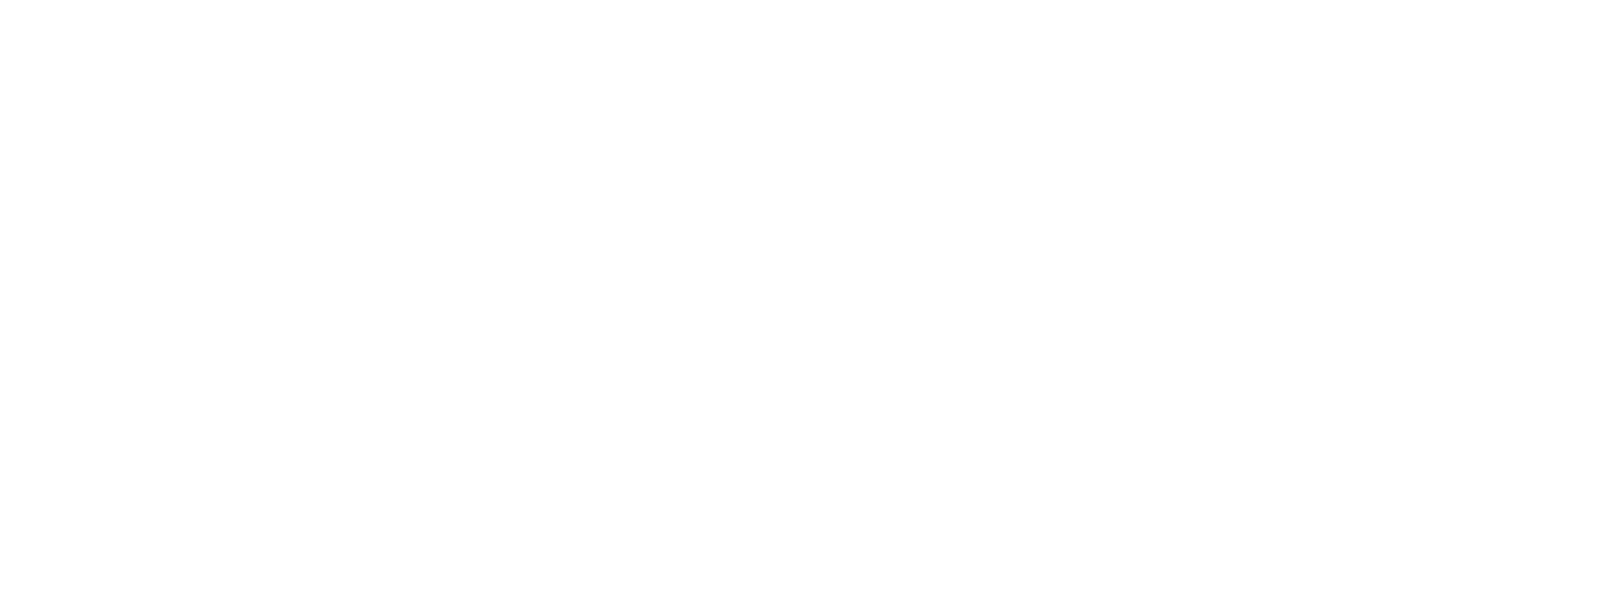

In [77]:
MC_low_index = 2500
MC_high_index = 3200

%matplotlib notebook
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (8,3)

plt.figure()
plt.plot(power_trace_diff_1[MC_low_index:MC_high_index], label = "0th row : No shift") # Observe diff. at MC (between 2500 - 3200)
plt.plot(power_trace_diff_2[MC_low_index:MC_high_index], label = "1st row : 1 shift")
plt.plot(power_trace_diff_3[MC_low_index:MC_high_index], label = "2nd row : 2 shifts")
plt.plot(power_trace_diff_4[MC_low_index:MC_high_index], label = "3rd row : 3 shifts")
plt.legend(loc="upper left")
plt.show()

## Attack on Mix Columns

## Algo 2

In [10]:
def algo2(p, i):
    # AK(0) : 590 - 1265
    scope.adc.offset = 590 # AK0_low_index = 590
    scope.adc.samples = 1265 - 590 # AK0_high_index = 1265
    
    L = {255:0, 246:1, 210:2, 126:3, 0:4, -126:5, -210:6, -246:7, -255:8}
    e = encrypt_p_power_repeat_n(p, 100) # average trace
    h = 0
    for t in range(256):
        print(t)
        p[i] = t
        e_p = encrypt_p_power_repeat_n(p, 100)
        # Count how many t have a larger/smaller Hamming weight.
        e_p_count = np.count_nonzero(np.array(e_p) - np.array(e) > 0)
        e_count = len(e) - e_p_count
        if e_p_count < e_count:
            h = h - 1
        elif e_p_count > e_count:
            h = h + 1
    tmp_min_fct = float('inf')
    h_0_best = None
    for h_0 in L.keys():
        if abs(h - h_0) <= tmp_min_fct:
            h_0_best = h_0
            tmp_min_fct = abs(h - h_0)
    return L[h_0_best]

In [38]:
algo2(plaintext, 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


3

In [11]:
def find_active_column(avg_trace_shift, avg_trace):
    argmax = np.argmax(np.abs(np.array(avg_trace_shift[MC_low_index:MC_high_index]) - np.array(avg_trace[MC_low_index:MC_high_index])))
    if argmax >= 0 and argmax <= 190:
        return 0
    if argmax <= 370:
        return 3
    if argmax <= 510:
        return 2
    if argmax <= 700:
        return 1

In [12]:
set_u = 0xFF

def find_u_activating_jth_column(plaintext, j):
    avg_trace = encrypt_p_power_repeat_n(plaintext, 100)
    u_result = []
    for i in range(16):
        assert plaintext[i] != set_u
        tmp = plaintext[i]
        plaintext[i] = set_u
        avg_trace_shift = encrypt_p_power_repeat_n(plaintext, 100)
        if find_active_column(avg_trace_shift, avg_trace) == j:
            u_result += [i]
        plaintext[i] = tmp
    return u_result

### Working with custom/random shift rows

In [13]:
%run "Setup_Scripts/Setup_Generic.ipynb"
AES_TINY_VERSION='V2'

INFO: Found ChipWhispererüòç


In [14]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$AES_TINY_VERSION"
cd hardware/victims/firmware/simpleserial-aes-3
make PLATFORM=$1 CRYPTO_TARGET=$2  AES_TINY_VERSION=$3

Building for platform CW308_STM32F4 with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
make clean_objs .dep 
make[1]¬†: on entre dans le r√©pertoire ¬´¬†/home/gata/Bureau/MA3/semester_project/project/hardware/victims/firmware/simpleserial-aes-3¬†¬ª
Building for platform CW308_STM32F4 with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CW308_STM32F4.hex
rm -f -- simpleserial-aes-CW308_STM32F4.eep
rm -f -- simpleserial-aes-CW308_STM32F4.cof
rm -f -- simpleserial-aes-CW308_STM32F4.elf
rm -f -- simpleserial-aes-CW308_STM32F4.map
rm -f -- simpleserial-aes-CW308_STM32F4.sym
rm -f -- simpleserial-aes-CW308_STM32F4.lss
rm -f -- objdir-CW308_STM32F4/*.o
rm -f -- objdir-CW308_STM32F4/*.lst
rm -f -- simpleserial-aes.s simpleserial.s stm32f4_hal.s stm32f4_hal_lowlevel.s stm32f4_sysmem.s stm32f4xx_hal_rng.s aes.s aes-independant.s random_shift_rows.s
rm -f -- simpleserial-aes.d sim

In file included from .././hal/stm32f4/stm32f4_hal.c:3:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


.
Compiling C: .././hal/stm32f4/stm32f4_hal_lowlevel.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F415RGTx -DSTM32F4 -DSTM32 -DDEBUG -DSTM32F415xx -DHAL_TYPE=HAL_stm32f4 -DPLATFORM=CW308_STM32F4 -DTINYAES128C -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F4/stm32f4_hal_lowlevel.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f4 -I.././hal/stm32f4/CMSIS -I.././hal/stm32f4/CMSIS/core -I.././hal/stm32f4/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto3/ -I.././crypto3/tiny-AES128-C -std=gnu99  -MMD -MP -MF .dep/stm32f4_hal_lowlevel.o.d .././hal/stm32f4/stm32f4_hal_lowlevel.c -o objdir-CW308_STM32F4/stm32f4_hal_lowlevel.o


In file included from .././hal/stm32f4/stm32f4_hal_lowlevel.c:39:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


.
Compiling C: .././hal/stm32f4/stm32f4_sysmem.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F415RGTx -DSTM32F4 -DSTM32 -DDEBUG -DSTM32F415xx -DHAL_TYPE=HAL_stm32f4 -DPLATFORM=CW308_STM32F4 -DTINYAES128C -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F4/stm32f4_sysmem.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f4 -I.././hal/stm32f4/CMSIS -I.././hal/stm32f4/CMSIS/core -I.././hal/stm32f4/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto3/ -I.././crypto3/tiny-AES128-C -std=gnu99  -MMD -MP -MF .dep/stm32f4_sysmem.o.d .././hal/stm32f4/stm32f4_sysmem.c -o objdir-CW308_STM32F4/stm32f4_sysmem.o
.
Compiling C: .././hal/stm32f4/stm32f4xx_hal_rng.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fme

.././hal/stm32f4/stm32f4xx_hal_rng.c: In function 'HAL_RNG_GenerateRandomNumber':
.././hal/stm32f4/stm32f4xx_hal_rng.c:264:17: warning: implicit declaration of function 'HAL_GetTick' [-Wimplicit-function-declaration]
  264 |     tickstart = HAL_GetTick();
      |                 ^~~~~~~~~~~


.
Compiling C: .././crypto3/tiny-AES128-C/aes.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F415RGTx -DSTM32F4 -DSTM32 -DDEBUG -DSTM32F415xx -DHAL_TYPE=HAL_stm32f4 -DPLATFORM=CW308_STM32F4 -DTINYAES128C -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F4/aes.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f4 -I.././hal/stm32f4/CMSIS -I.././hal/stm32f4/CMSIS/core -I.././hal/stm32f4/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto3/ -I.././crypto3/tiny-AES128-C -std=gnu99  -MMD -MP -MF .dep/aes.o.d .././crypto3/tiny-AES128-C/aes.c -o objdir-CW308_STM32F4/aes.o
.
Compiling C: .././crypto3/aes-independant.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -DNO_EXTRA_OPTS -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwar

In [15]:
cw.program_target(scope, prog, "hardware/victims/firmware/simpleserial-aes-3/simpleserial-aes-{}.hex".format(PLATFORM))
project = cw.create_project("traces/STM32F4_HW_AES_3.cwp", overwrite=True)

Detected known STMF32: STM32F40xxx/41xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 9855 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 9855 bytes


In [16]:
plaintext = [0x00 for i in range(16)]
key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x15, 0x88, 0x09, 0xcf, 0x4f, 0x3c]
set_up(key)

MAX_cwlite = 24400
scope.adc.samples = 10000

avg_trace = encrypt_p_power_repeat_n(plaintext, 1000)

NameError: name 'set_up' is not defined

In [ ]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (8,3)

plt.figure()
plt.plot(avg_trace)
plt.show()

BlockCopy: 20 - 500

Round key (AK) : 590 - 1265

Sub bytes (SB) : 1390 - 2200

Shift rows (PB) : 2200 - 5050

Mix Columns (MC) : 5050 - 5800

Round key (AK) : 5800 - 6550


In [29]:
plaintext = [0x00 for i in range(16)]
key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x15, 0x88, 0x09, 0xcf, 0x4f, 0x3c]
set_up(key)

MAX_cwlite = 24400
scope.adc.samples = 9000

avg_trace = np.array(encrypt_p_power_repeat_n(plaintext, 1000))

plaintext_0_shift = [0x00 for i in range(3)] + [0xFF] + [0x00 for i in range(12)]
plaintext_1_shift = [0x00 for i in range(7)] + [0xFF] + [0x00 for i in range(8)]
plaintext_2_shift = [0x00 for i in range(11)] + [0xFF] + [0x00 for i in range(4)]
plaintext_3_shift = [0x00 for i in range(15)] + [0xFF]

avg_trace_0_shift = np.array(encrypt_p_power_repeat_n(plaintext_0_shift, 1000))
avg_trace_1_shift = np.array(encrypt_p_power_repeat_n(plaintext_1_shift, 1000))
avg_trace_2_shift = np.array(encrypt_p_power_repeat_n(plaintext_2_shift, 1000))
avg_trace_3_shift = np.array(encrypt_p_power_repeat_n(plaintext_3_shift, 1000))

In [30]:
power_trace_diff_1 = np.abs(avg_trace_0_shift - avg_trace) 
power_trace_diff_2 = np.abs(avg_trace_1_shift - avg_trace) 
power_trace_diff_3 = np.abs(avg_trace_2_shift - avg_trace) 
power_trace_diff_4 = np.abs(avg_trace_3_shift - avg_trace) 

<IPython.core.display.Javascript object>


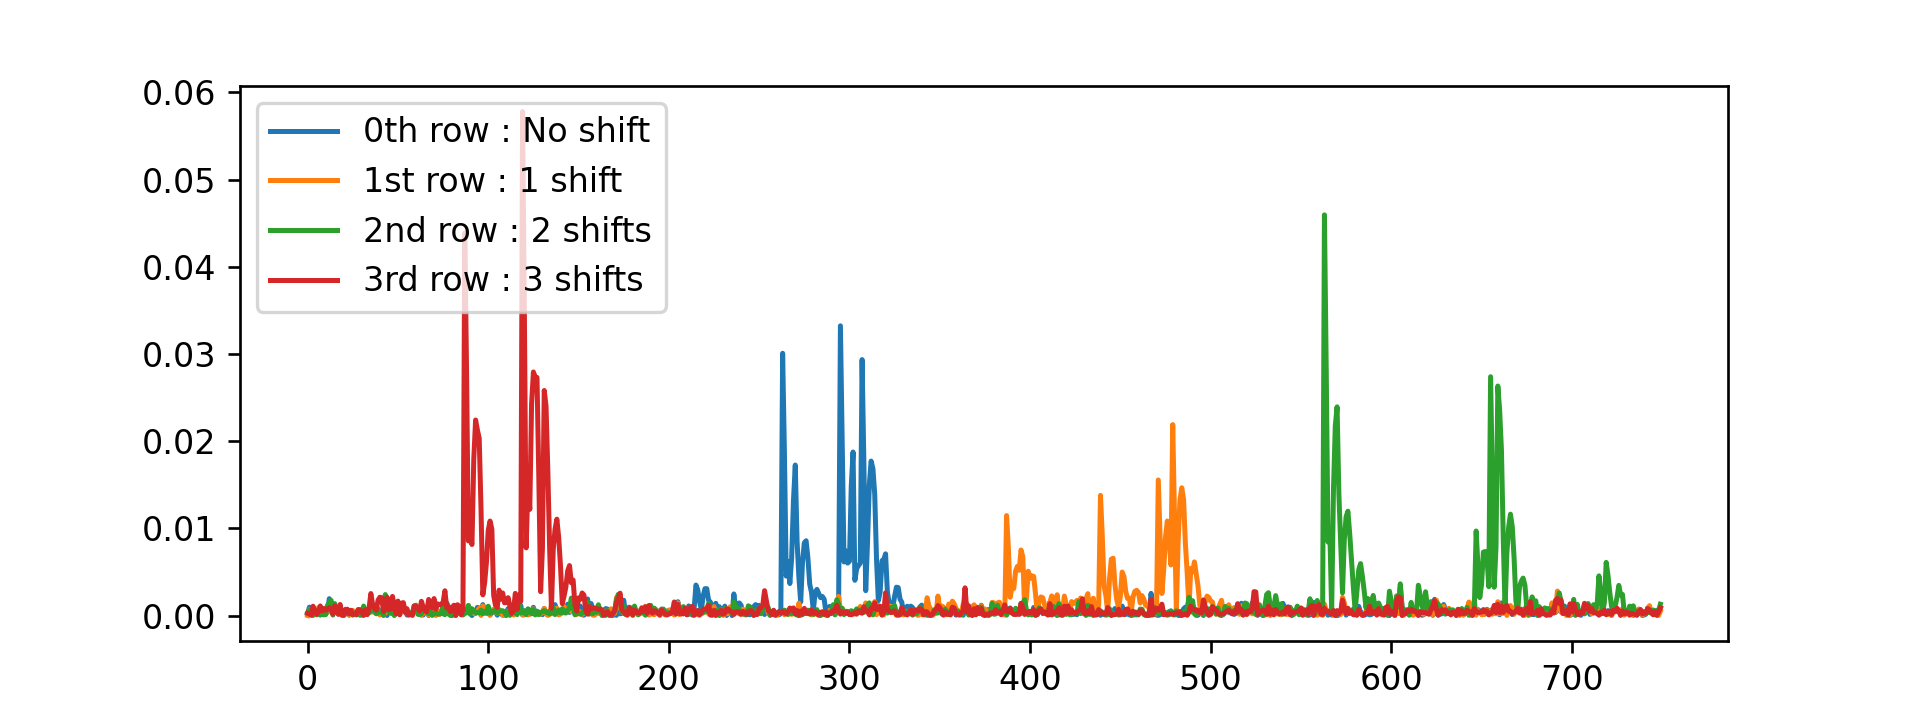

In [31]:
MC_low_index = 5050
MC_high_index = 5800

%matplotlib notebook
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (8,3)

plt.figure()
plt.plot(power_trace_diff_1[MC_low_index:MC_high_index], label = "0th row : No shift") # Observe diff. at MC (between 2500 - 3200)
plt.plot(power_trace_diff_2[MC_low_index:MC_high_index], label = "1st row : 1 shift")
plt.plot(power_trace_diff_3[MC_low_index:MC_high_index], label = "2nd row : 2 shifts")
plt.plot(power_trace_diff_4[MC_low_index:MC_high_index], label = "3rd row : 3 shifts")
plt.legend(loc="upper left")
plt.show()

In [ ]:
def find_active_column(avg_trace_shift, avg_trace):
    # argmax = np.argmax(np.abs(np.array(avg_trace_shift[MC_low_index:MC_high_index]) - np.array(avg_trace[MC_low_index:MC_high_index])))
    argmax = np.argmax(np.abs(np.array(avg_trace_shift[:]) - np.array(avg_trace[:])))
    if argmax >= 0 and argmax <= 200:
        return 0
    if argmax <= 360:
        return 3
    if argmax <= 510:
        return 2
    if argmax <= 720:
        return 1
    
set_u = 0xFF

def find_u_activating_jth_column(plaintext, j):
    avg_trace = encrypt_p_power_repeat_n(plaintext, 100)
    u_result = []
    for i in range(16):
        assert plaintext[i] != set_u
        tmp = plaintext[i]
        plaintext[i] = set_u
        avg_trace_shift = encrypt_p_power_repeat_n(plaintext, 100)
        if find_active_column(avg_trace_shift, avg_trace) == j:
            u_result += [i]
        plaintext[i] = tmp
    return u_result

### Software test

In [27]:
plain_state = bytes2matrix(plaintext)

add_round_key(plain_state, key[0])
    

sub_bytes(plain_state)
print(plain_state)
state_to_hamming_weight(plain_state)
w_i = []

for i in range(4):
    for j in range(4):
        w_i += [plain_state[i][j]]

print(w_i)

[[0, 163, 162, 212], [52, 0, 181, 36], [98, 104, 89, 196], [1, 138, 132, 235]]
[0, 4, 3, 4, 3, 0, 5, 2, 3, 3, 4, 3, 1, 3, 2, 6]


In [90]:
# Step 1
# plaintext = [0x79] + [0x0F for i in range(3)] + [0x00, 0xFC, 0x00, 0x00] + [0x00 for i in range(8)]
# plaintext_p = [0x56, 0x0F, 0x0F, 0x0F] + [0x00, 0x36, 0x00, 0x00] + [0x00 for i in range(8)]
plaintext = [0x79] + [0x0F for i in range(3)] + [0x00, 0xFC, 0x00, 0x00] + [0x00 for i in range(8)]
plaintext_p = [0x56, 0x0F, 0x0F, 0x0F] + [0x00, 0x00, 0x00, 0x00] + [0x00 for i in range(8)]



key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x15, 0x88, 0x09, 0xcf, 0x4f, 0x3c]
key = expand_key(key)

plaintext_state = bytes2matrix(plaintext)
add_round_key(plaintext_state, key[0]) 
print_state_to_hex_str(plaintext_state)
sub_bytes(plaintext_state)
print_state_to_hex_str(plaintext_state)
shift_rows(plaintext_state)
#mix_columns(plaintext_state)
b_PB_1 = matrix2bytes(plaintext_state)

plaintext_p_state = bytes2matrix(plaintext_p)
add_round_key(plaintext_p_state, key[0]) 
print_state_to_hex_str(plaintext_p_state)
sub_bytes(plaintext_p_state)
print_state_to_hex_str(plaintext_p_state)
shift_rows(plaintext_p_state)
#mix_columns(plaintext_p_state)
b_PB_1_p = matrix2bytes(plaintext_p_state)


# 0. Compute d0, d1, d2, d3
d_list = []
for i in range(4):
    d_list += [(b_PB_1[i] ^ b_PB_1_p[i]) & 0xFF]

[['52', '71', '1a', '19'], ['28', '52', 'd2', 'a6'], ['ab', 'f7', '15', '88'], ['9', 'cf', '4f', '3c']]
[['0', 'a3', 'a2', 'd4'], ['34', '0', 'b5', '24'], ['62', '68', '59', 'c4'], ['1', '8a', '84', 'eb']]
[['7d', '71', '1a', '19'], ['28', 'ae', 'd2', 'a6'], ['ab', 'f7', '15', '88'], ['9', 'cf', '4f', '3c']]
[['ff', 'a3', 'a2', 'd4'], ['34', 'e4', 'b5', '24'], ['62', '68', '59', 'c4'], ['1', '8a', '84', 'eb']]


In [91]:
# 2
tmp = plaintext
for i in range(256):
    tmp[0] = i
    plaintext_state = bytes2matrix(tmp)
    add_round_key(plaintext_state, key[0])  
    sub_bytes(plaintext_state)
    if plaintext_state[0][0] == 0x00:
        print(hex(i))
        
tmp = plaintext
for i in range(256):
    tmp[4*1 + 1] = i
    plaintext_state = bytes2matrix(tmp)
    add_round_key(plaintext_state, key[0])  
    sub_bytes(plaintext_state)
    if plaintext_state[1][1] == 0x00:
        print(hex(i))

# p_u(0) = 0x79
# p_u(1) = 0xFC

0x79
0xfc


In [92]:
# 3.
# Loop of p_u0_p, st H(b_u0_p, SB(1)) = 8
tmp = plaintext_p
for i in range(256):
    tmp[0] = i
    plaintext_state = bytes2matrix(tmp)
    add_round_key(plaintext_state, key[0])  
    sub_bytes(plaintext_state)
    if HW[plaintext_state[0][0]] == 8:
        print(hex(i))
        
# p_u_p(0) = 0x56

0x56


In [93]:
# 4
tmp = plaintext
tmp2 = plaintext_p
for i in range(256):
    tmp2[4*1 + 1] = i
    
    plaintext_state = bytes2matrix(tmp)
    add_round_key(plaintext_state, key[0])  
    sub_bytes(plaintext_state)
    shift_rows(plain_state)
    mix_columns(plain_state)
    add_round_key(plain_state, key[1])
    
    plaintext_state_p = bytes2matrix(tmp2)
    add_round_key(plaintext_state_p, key[0])  
    sub_bytes(plaintext_state_p)
    shift_rows(plaintext_state_p)
    mix_columns(plaintext_state_p)
    add_round_key(plaintext_state_p, key[1])

    if plaintext_state[1][0] == plaintext_state_p[1][0]:
        print(hex(i))
        
# p_u_p(1) = 0x36

In [94]:
# 5

tmp = plaintext_p
    
plaintext_state = bytes2matrix(tmp)
add_round_key(plaintext_state, key[0])  
sub_bytes(plaintext_state)
print(hex(plaintext_state[1][1]))
print(HW[plaintext_state[1][1]])

# H(b_u(1)_p) = 4

0xd1
4


In [82]:
# TODO: continue 10 steps
print(d_list)
# Step 1 : [255, 70, 0, 0]
# Step 3 : [255, 70, 0, 0]

[255, 0, 0, 0]


### Hardware test

In [ ]:
# scope.adc.offset = 5050 # MC_low_index = 5050
# scope.adc.samples = 5800 - 5050 # MC_high_index = 5800

print(scope.adc.offset)
print(scope.adc.samples)

scope.adc.offset = 5000
scope.adc.samples  = 3000
scope.adc.timeout = 20.0

print(scope.adc.offset)
print(scope.adc.samples)

plaintext = [0x00 for i in range(16)]
set_u = 0xFF

for k in range(4):
    res= find_u_activating_jth_column(plaintext, k)
    print(f"u_i activating {k}th column are : {res}")

In [ ]:
# 1
# Find {u0, u1, u2, u3} (ones that activate 0th column)  with plaintext
set_u_act_0_col_pt = find_u_activating_jth_column(plaintext, 0)
# Find {u0, u1, u2, u3} (ones that activate 0th column)  with plaintext'
set_u_act_0_col_pt_p = find_u_activating_jth_column(plaintext_p, 0)

In [98]:
print(set_u_act_0_col_pt)
print(set_u_act_0_col_pt_p)

[0, 5, 10, 15]
[0, 5, 10, 15]


In [103]:
# 1. p_u2 = p_u2', p_u3 = p_u3'
assert plaintext[set_u_act_0_col_pt[2]] == plaintext_p[set_u_act_0_col_pt_p[2]]
assert plaintext[set_u_act_0_col_pt[3]] == plaintext_p[set_u_act_0_col_pt_p[3]]

In [105]:
# 2. 
# Loop of p_u0, st H(b_u0, SB(1)) = 0
tmp = plaintext
for i in range(256):
    tmp[set_u_act_0_col_pt[0]] = i
    H_u0 = algo2(tmp, i)
    if H_u0 == 0:
        b_u0_SB_1 = tmp
        break

# Loop of p_u1, st H(b_u1, SB(1)) = 0
tmp = plaintext
for i in range(256):
    tmp[set_u_act_0_col_pt[1]] = i
    H_u1 = algo2(tmp, i)
    if H_u1 == 0:
        b_u1_SB_1 = tmp
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
3

KeyboardInterrupt: 

In [ ]:
# 3.
# Loop of p_u0_p, st H(b_u0_p, SB(1)) = 8
tmp = plaintext_p
for i in range(256):
    tmp[set_u_act_0_col_pt_p[0]] = i
    H_u0 = algo2(tmp, i)
    if H_u0 == 8:
        b_u1_SB_1 = tmp
        break

In [ ]:
# 4. 
# Loop of p_u1_p
scope.adc.offset = 5800 # AK_low_index = 5800
scope.adc.samples = 6550 - 5800 # AK_high_index = 6550

power_trace_AK_1 = np.array(encrypt_p_power_repeat_n(plaintext, 1000))[:]
tmp = plaintext_p
for i in range(256):
    if i != plaintext[set_u_act_0_col_pt[0]]:s
        tmp[set_u_act_0_col_pt_p[1]] = i
        power_trace_AK_1_p = np.array(encrypt_p_power_repeat_n(tmp, 100))[:]
        if np.max(np.abs(power_trace_AK_1_p - power_trace_AK_1)) < 0.01:
            p_u1_p_sol = i # = x_1 = d_1
            break

In [ ]:
# 5.
# Compute H(p_u1_p)
tmp = plaintext_p
tmp[set_u_act_0_col_pt_p[1]] = p_u1_p_sol
w1 = algo2(tmp, set_u_act_0_col_pt_p[1]) 

In [ ]:
# Compute w_i
# Redo 1, 2, 3, 4, 5

In [2]:
# Guess a, b, c, d
# RUN Solving_equations.ipynb with w_i updated

### Disconnect board

In [ ]:
scope.dis()
target.dis()